<a href="https://colab.research.google.com/github/vallka/covid/blob/main/covid_in_scotland_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's do a little bit of pandas. Pandas is (or are? :) extremely popular. Let's just dive in.

First of all, using pandas is the easiest way to open an Excel file. Just one line of code. Let's take, for example, this file - 

**Weekly deaths by location of death, age group, sex and cause, 2020 and 2021
(10 March 2021)**

**weekly-deaths-by-location-age-sex.xlsx**

Taken from official the site: 

https://www.nrscotland.gov.uk/statistics-and-data/statistics/statistics-by-theme/vital-events/general-publications/weekly-and-monthly-data-on-births-and-deaths/deaths-involving-coronavirus-covid-19-in-scotland/related-statistics


In [51]:
import pandas as pd

data = pd.read_excel ('https://www.nrscotland.gov.uk/files//statistics/covid19/weekly-deaths-by-location-age-sex.xlsx',
 sheet_name='Data',
        skiprows=4,
        skipfooter=2,
        usecols='A:F',
        header=None,
        names=['week','location','sex','age','cause','deaths']
        )

data

,week,location,sex,age,cause,deaths
0,20W01,Care Home,F,15-44,Non-COVID-19,3
1,20W01,Care Home,M,45-64,Non-COVID-19,8
2,20W01,Care Home,F,45-64,Non-COVID-19,10
3,20W01,Care Home,M,65-74,Non-COVID-19,12
4,20W01,Care Home,F,65-74,Non-COVID-19,18
...,...,...,...,...,...,...
3481,21W09,Hospital,F,75-84,Non-COVID-19,86
3482,21W09,Hospital,M,85+,Non-COVID-19,63
3483,21W09,Hospital,F,85+,Non-COVID-19,67
3484,21W09,Other institution,F,75-84,Non-COVID-19,1


First of all, we are able to read file directly from Internet. The few parameters we used are self-explaining: we need to skip first four rows, two last rows also of no iunteret. We also need to specify column headers, as in the original file they are somehow occupy both third and fourth rows and pandas iw not able to detect them correctly.

There are a lot of data, we'll try to use most of them later. But the first task will be to get simple totals by week.

In SQL this would be achieved by using **group by**:

select sum(deaths) from data group by week

What is the equqivalent in pandas?

In [41]:
import numpy as np
data.groupby('week').agg({'deaths': np.sum})

,deaths
week,
20W01,1161
20W02,1567
20W03,1322
20W04,1226
20W05,1188
...,...
21W05,1506
21W06,1412
21W07,1422


**group by* became **groupby()** method. A bit messy with **sum**: firstly, we had to import numpy as np, secondly, we had to use an additional function - **agg()**. On a good side, with **agg()** we can use much more statisdtical function than any flavour of SQL would allow. np.median is probably the most noticible example - they is no simple way to get median with SQL. And with **agg()** we can use our own functions as well.

Let's plot a graph immediately! 

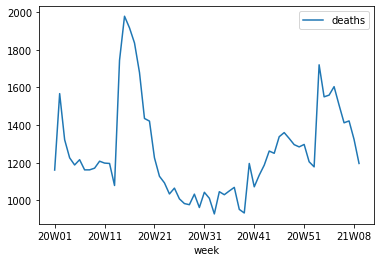

In [ ]:
data.groupby('week').agg({'deaths': np.sum}).plot()

Let's make it a bit bigger and add a title:

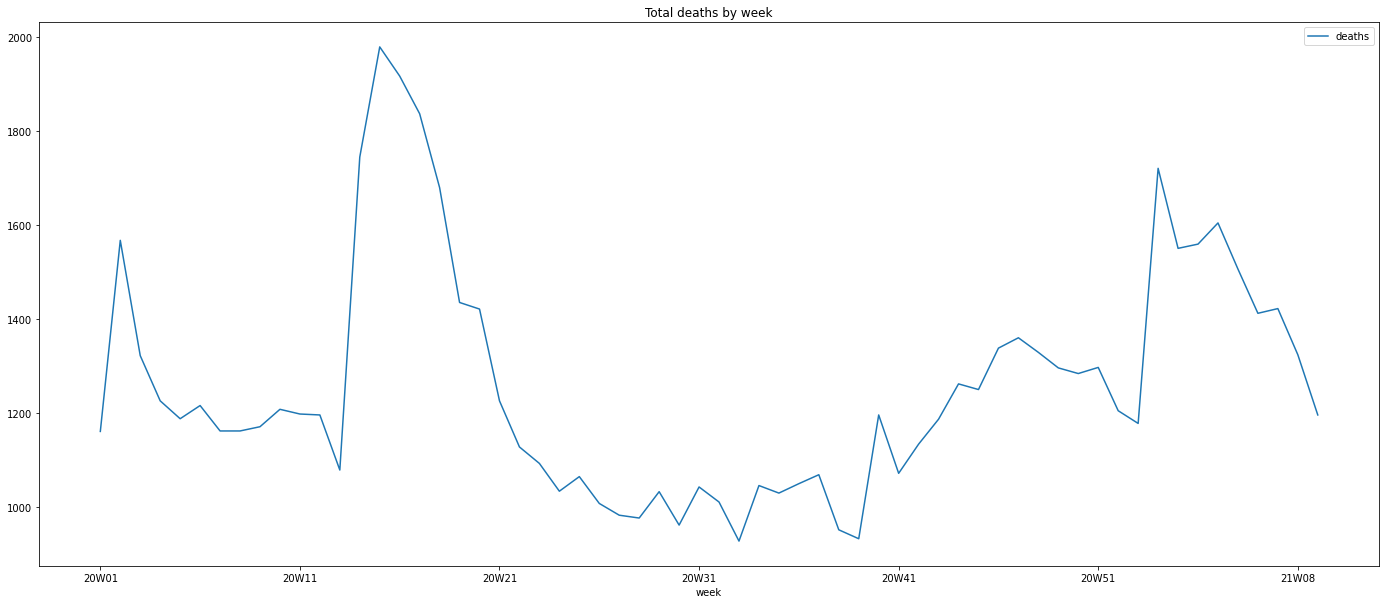

In [28]:
data.groupby('week').agg({'deaths': np.sum}).plot(figsize=(24,10),title='Total deaths by week')

**figsize** is mesured in inches, according to documentation. 24 x 10 seems to be fine for my screen.

Ok, we have a nice big chart with totals for years 2020-2021. Let's add data for previuos years, they just happened to be on the same web page:

**Weekly deaths by location of death, age group and sex, 2015 to 2019**

**weekly-deaths-by-location-age-group-sex-15-19.xlsx**

Web page:

https://www.nrscotland.gov.uk/statistics-and-data/statistics/statistics-by-theme/vital-events/general-publications/weekly-and-monthly-data-on-births-and-deaths/deaths-involving-coronavirus-covid-19-in-scotland/related-statistics



In [30]:
data_1519 = pd.read_excel ('https://www.nrscotland.gov.uk/files//statistics/covid19/weekly-deaths-by-location-age-group-sex-15-19.xlsx',
        sheet_name='Data',
        skiprows=4,
        skipfooter=2,
        usecols='A:F',
        header=None,
        names=['year','week','location','sex','age','deaths'])

data_1519

,year,week,location,sex,age,deaths
0,15,1,Hospital,F,0,2
1,15,1,Hospital,M,0,3
2,15,2,Hospital,M,0,2
3,15,2,Hospital,F,0,3
4,15,3,Hospital,F,0,3
...,...,...,...,...,...,...
9348,19,52,Care Home,F,85+,102
9349,19,52,Home / Non-institution,F,85+,30
9350,19,52,Home / Non-institution,M,85+,31
9351,19,52,Hospital,M,85+,72


The structure of the data is almost the same. There is no cause column. Let's just add it:

In [32]:
data_1519['cause'] = 'Pre-COVID-19'

Let's rearrange the colums to make it closer to our first data:

In [35]:
neworder =['year','week','location','sex','age','cause','deaths']
data_1519 = data_1519.reindex(columns=neworder)
data_1519

,year,week,location,sex,age,cause,deaths
0,15,1,Hospital,F,0,Pre-COVID-19,2
1,15,1,Hospital,M,0,Pre-COVID-19,3
2,15,2,Hospital,M,0,Pre-COVID-19,2
3,15,2,Hospital,F,0,Pre-COVID-19,3
4,15,3,Hospital,F,0,Pre-COVID-19,3
...,...,...,...,...,...,...,...
9348,19,52,Care Home,F,85+,Pre-COVID-19,102
9349,19,52,Home / Non-institution,F,85+,Pre-COVID-19,30
9350,19,52,Home / Non-institution,M,85+,Pre-COVID-19,31
9351,19,52,Hospital,M,85+,Pre-COVID-19,72


Now we need to do something with **week** column of the first table. Let's split it into year and week to match the second table:

In [52]:
data_2021 = data  # let's keep original DataFrame as is and work with a copy from now on

data_2021['year'] = data_2021.week.str.slice(0,2).astype(int)
data_2021['week'] = data_2021.week.str.slice(3,5).astype(int)

data_2021

,week,location,sex,age,cause,deaths,year
0,1,Care Home,F,15-44,Non-COVID-19,3,20
1,1,Care Home,M,45-64,Non-COVID-19,8,20
2,1,Care Home,F,45-64,Non-COVID-19,10,20
3,1,Care Home,M,65-74,Non-COVID-19,12,20
4,1,Care Home,F,65-74,Non-COVID-19,18,20
...,...,...,...,...,...,...,...
3481,9,Hospital,F,75-84,Non-COVID-19,86,21
3482,9,Hospital,M,85+,Non-COVID-19,63,21
3483,9,Hospital,F,85+,Non-COVID-19,67,21
3484,9,Other institution,F,75-84,Non-COVID-19,1,21


And rearrage columns to match

In [53]:
neworder =['year','week','location','sex','age','cause','deaths']
data_2021 = data_2021.reindex(columns=neworder)
data_2021

,year,week,location,sex,age,cause,deaths
0,20,1,Care Home,F,15-44,Non-COVID-19,3
1,20,1,Care Home,M,45-64,Non-COVID-19,8
2,20,1,Care Home,F,45-64,Non-COVID-19,10
3,20,1,Care Home,M,65-74,Non-COVID-19,12
4,20,1,Care Home,F,65-74,Non-COVID-19,18
...,...,...,...,...,...,...,...
3481,21,9,Hospital,F,75-84,Non-COVID-19,86
3482,21,9,Hospital,M,85+,Non-COVID-19,63
3483,21,9,Hospital,F,85+,Non-COVID-19,67
3484,21,9,Other institution,F,75-84,Non-COVID-19,1


We have to update our groupby function to reflect this change:

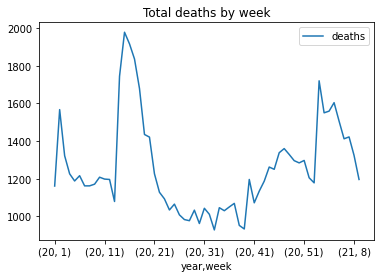

In [132]:
data_2021.groupby(['year','week']).agg({'deaths': np.sum}).plot(title='Total deaths by week')

Let's plot 15/19 data the same way:

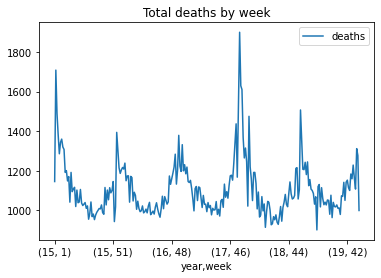

In [133]:
data_1519.groupby(['year','week']).agg({'deaths': np.sum}).plot(title='Total deaths by week')

This is definitely not what we wanted. Let's find an easy way forward.

I think it would make sense to save our groupby'd data in a new DataFrame and play with saved totals:

In [161]:
totals_1519 = data_1519.groupby(['year','week']).agg({'deaths': np.sum})
totals_1519['deaths_15'] = None
totals_1519['deaths_16'] = None
totals_1519['deaths_17'] = None
totals_1519['deaths_18'] = None
totals_1519['deaths_19'] = None

totals_1519

deaths deaths_15 deaths_16 deaths_17 deaths_18 deaths_19
year week                                                          
15   1       1146      None      None      None      None      None
     2       1708      None      None      None      None      None
     3       1489      None      None      None      None      None
     4       1381      None      None      None      None      None
     5       1286      None      None      None      None      None
...           ...       ...       ...       ...       ...       ...
19   48      1163      None      None      None      None      None
     49      1108      None      None      None      None      None
     50      1312      None      None      None      None      None
     51      1277      None      None      None      None      None
     52      1000      None      None      None      None      None

[261 rows x 6 columns]

In [137]:
totals_1519.shape

(261, 6)

What I wanted to do: create columns death_xx for each year, None by default, and then copy actual values only for given year, leaving Nones in the columns for other years. And I couldn't accomplish this before I have realized that the DataFrame structure is somewhat different from what I expected - it has 6 columns (deaths	deaths_15	deaths_16	deaths_17	deaths_18	deaths_19) and one Multiindex (year,week) (I think Multiindex corresponds to a familiar Composite index in SQL). And index isn't counted as columns, so we need to re-structure the DataFrame, using the following function:

In [162]:
totals_1519.reset_index(inplace=True)
totals_1519

,year,week,deaths,deaths_15,deaths_16,deaths_17,deaths_18,deaths_19
0,15,1,1146,None,None,None,None,None
1,15,2,1708,None,None,None,None,None
2,15,3,1489,None,None,None,None,None
3,15,4,1381,None,None,None,None,None
4,15,5,1286,None,None,None,None,None
...,...,...,...,...,...,...,...,...
256,19,48,1163,None,None,None,None,None
257,19,49,1108,None,None,None,None,None
258,19,50,1312,None,None,None,None,None
259,19,51,1277,None,None,None,None,None


Let's populate deaths_xx columns as we wanted:

In [163]:
totals_1519.loc[totals_1519['year']==15,'deaths_15']=totals_1519['deaths']
totals_1519.loc[totals_1519['year']==16,'deaths_16']=totals_1519['deaths']
totals_1519.loc[totals_1519['year']==17,'deaths_17']=totals_1519['deaths']
totals_1519.loc[totals_1519['year']==18,'deaths_18']=totals_1519['deaths']
totals_1519.loc[totals_1519['year']==19,'deaths_19']=totals_1519['deaths']
totals_1519

,year,week,deaths,deaths_15,deaths_16,deaths_17,deaths_18,deaths_19
0,15,1,1146,1146,None,None,None,None
1,15,2,1708,1708,None,None,None,None
2,15,3,1489,1489,None,None,None,None
3,15,4,1381,1381,None,None,None,None
4,15,5,1286,1286,None,None,None,None
...,...,...,...,...,...,...,...,...
256,19,48,1163,None,None,None,None,1163
257,19,49,1108,None,None,None,None,1108
258,19,50,1312,None,None,None,None,1312
259,19,51,1277,None,None,None,None,1277


Now we can plot all 6 lines in a single graph:

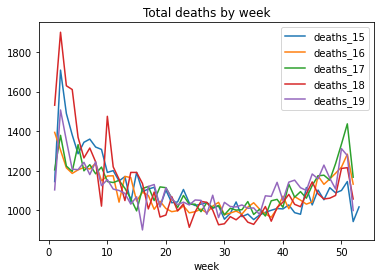

In [164]:
totals_1519.plot(x='week',y=['deaths_15','deaths_16','deaths_17','deaths_18','deaths_19'],title='Total deaths by week')

Let's do the same with 20/21 data:

In [165]:
totals_2021 = data_2021.groupby(['year','week']).agg({'deaths': np.sum})
totals_2021['deaths_20'] = None
totals_2021['deaths_21'] = None
totals_2021.reset_index(inplace=True)
totals_2021.loc[totals_2021['year']==20,'deaths_20']=totals_2021['deaths']
totals_2021.loc[totals_2021['year']==21,'deaths_21']=totals_2021['deaths']
totals_2021

,year,week,deaths,deaths_20,deaths_21
0,20,1,1161,1161,None
1,20,2,1567,1567,None
2,20,3,1322,1322,None
3,20,4,1226,1226,None
4,20,5,1188,1188,None
...,...,...,...,...,...
57,21,5,1506,None,1506
58,21,6,1412,None,1412
59,21,7,1422,None,1422
60,21,8,1324,None,1324


Now we are ready to combine two DataFrames into a final totals DataFrame. Tho thing to notice: 
* pandas puts NaN, non None, in empty cells. Doesn't affect us in this case
* it is really difficult to predict which operations are performed in place and 
which return the new DataFrame...


In [168]:
totals = totals_1519
totals=totals.append(totals_2021,ignore_index=True)
totals

,year,week,deaths,deaths_15,deaths_16,deaths_17,deaths_18,deaths_19,deaths_20,deaths_21
0,15,1,1146,1146,None,None,None,None,NaN,NaN
1,15,2,1708,1708,None,None,None,None,NaN,NaN
2,15,3,1489,1489,None,None,None,None,NaN,NaN
3,15,4,1381,1381,None,None,None,None,NaN,NaN
4,15,5,1286,1286,None,None,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
318,21,5,1506,NaN,NaN,NaN,NaN,NaN,None,1506
319,21,6,1412,NaN,NaN,NaN,NaN,NaN,None,1412
320,21,7,1422,NaN,NaN,NaN,NaN,NaN,None,1422
321,21,8,1324,NaN,NaN,NaN,NaN,NaN,None,1324


Let's plot the final totals:

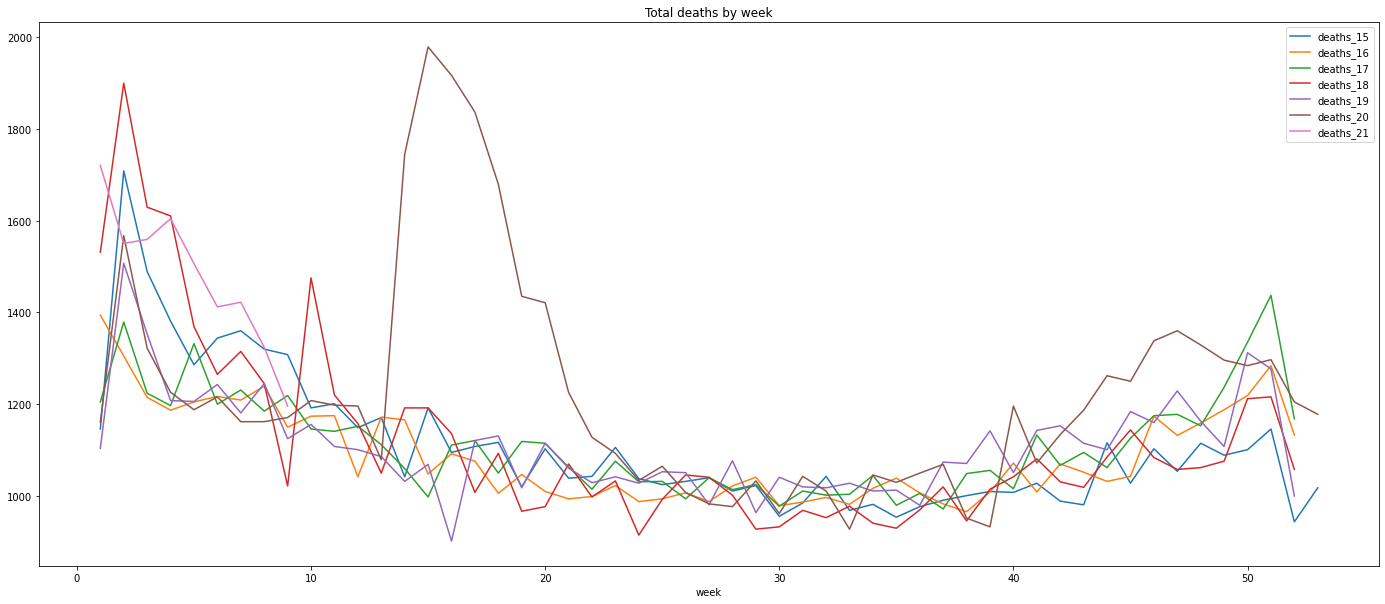

In [173]:
totals.plot(x='week',y=['deaths_15','deaths_16','deaths_17','deaths_18','deaths_19','deaths_20','deaths_21'],title='Total deaths by week',figsize=(24,10))

And to finish today's exersizers let's concentrate on first 9 weeks of the years:

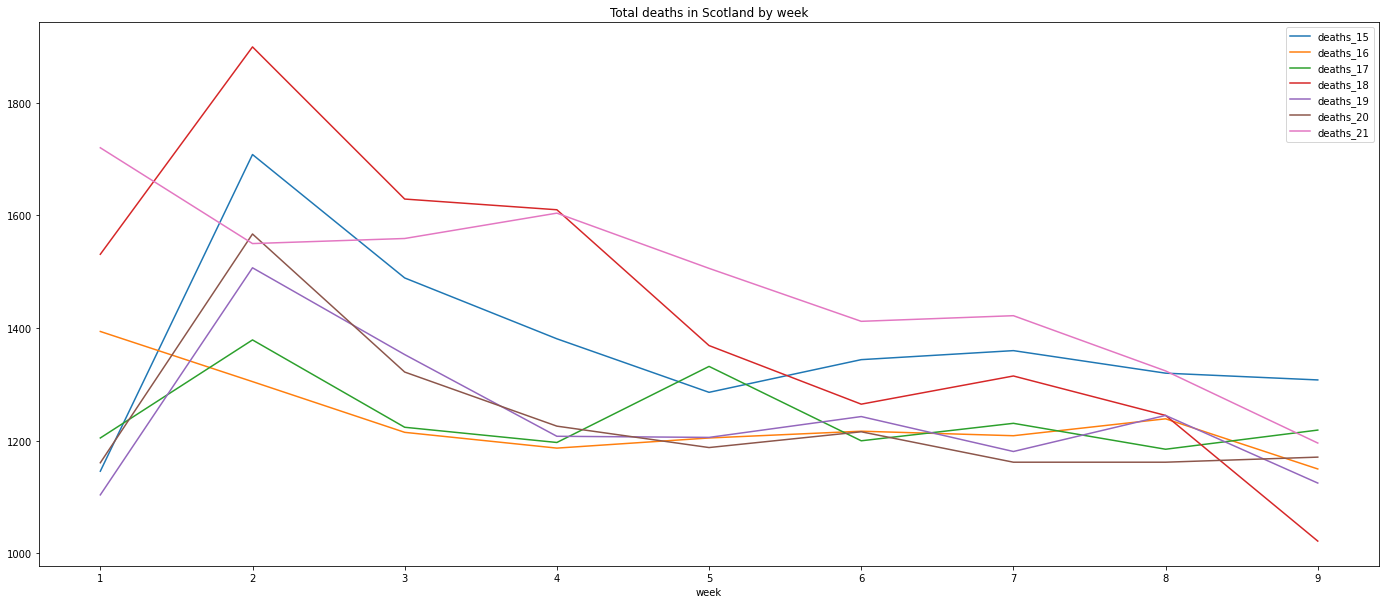

In [176]:
totals[totals['week']<=9].plot(x='week',y=['deaths_15','deaths_16','deaths_17','deaths_18','deaths_19','deaths_20','deaths_21'],title='Total deaths in Scotland by week',figsize=(24,10))

To be continued...